In [11]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/8-transportation-and-route-optimization/Multi-Modal_Transportation_Optimization.xlsx


## Introduction
>- The task involves optimizing transportation routes using a dataset related to multi-modal transportation. This dataset might include details about different transportation modes, routes, costs, times, and other relevant factors for optimization.

## Dataset Content

* The dataset file is named "Multi-Modal_Transportation_Optimization.xlsx". It likely contains multiple sheets, each with specific information relevant to transportation and route optimization.

In [12]:
import pandas as pd

# Load the dataset
file_path = '/mnt/data/Multi-Modal_Transportation_Optimization.xlsx'
xls = pd.ExcelFile('/kaggle/input/8-transportation-and-route-optimization/Multi-Modal_Transportation_Optimization.xlsx')

# Display sheet names to understand the structure
sheet_names = xls.sheet_names
sheet_names


['Route Information', 'Order Information']

In [13]:
# Load each sheet into a DataFrame
route_info_df = pd.read_excel(xls, sheet_name='Route Information')
order_info_df = pd.read_excel(xls, sheet_name='Order Information')

# Display the first few rows of each DataFrame
route_info_head = route_info_df.head()
order_info_head = order_info_df.head()

route_info_head, order_info_head


(   Route Number          Source     Destination  Container Size Carrier  \
 0             1  Singapore Port   Shanghai Port              67   COSCO   
 1             2   Shanghai Port  Singapore Port              67   COSCO   
 2             3  Singapore Port   Malaysia Port              34   COSCO   
 3             4   Malaysia Port  Singapore Port              34   COSCO   
 4             5   Shanghai Port   Malaysia Port              67   COSCO   
 
   Travel Mode  Fixed Freight Cost  Port/Airport/Rail Handling Cost  \
 0         Sea                 300                              300   
 1         Sea                 150                              300   
 2         Sea                  50                              280   
 3         Sea                  50                              280   
 4         Sea                 300                              180   
 
    Bunker/ Fuel Cost  Documentation Cost  ...  \
 0                400                 180  ...   
 1            

In [14]:
# Info
route_info_info = route_info_df.info()
order_info_info = order_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 25 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Route Number                             50 non-null     int64  
 1   Source                                   50 non-null     object 
 2   Destination                              50 non-null     object 
 3   Container Size                           50 non-null     int64  
 4   Carrier                                  50 non-null     object 
 5   Travel Mode                              50 non-null     object 
 6   Fixed Freight Cost                       50 non-null     int64  
 7   Port/Airport/Rail Handling Cost          50 non-null     int64  
 8   Bunker/ Fuel Cost                        50 non-null     int64  
 9   Documentation Cost                       50 non-null     int64  
 10  Equipment Cost                           50 non-null

In [15]:
# Describe
route_info_desc = route_info_df.describe()
order_info_desc = order_info_df.describe()


In [16]:
# Missing Values
route_info_missing = route_info_df.isnull().sum()
order_info_missing = order_info_df.isnull().sum()
route_info_info, order_info_info, route_info_desc, order_info_desc, route_info_missing, order_info_missing


(None,
 None,
        Route Number  Container Size  Fixed Freight Cost  \
 count      50.00000       50.000000           50.000000   
 mean       25.50000       31.240000          297.800000   
 std        14.57738       15.162467          508.603691   
 min         1.00000        7.000000           50.000000   
 25%        13.25000       34.000000           80.000000   
 50%        25.50000       34.000000          100.000000   
 75%        37.75000       34.000000          150.000000   
 max        50.00000       67.000000         2000.000000   
 
        Port/Airport/Rail Handling Cost  Bunker/ Fuel Cost  Documentation Cost  \
 count                        50.000000          50.000000           50.000000   
 mean                        177.200000         183.200000           64.400000   
 std                         245.905573         266.293072           78.510626   
 min                           0.000000           0.000000            0.000000   
 25%                           0.0

In [17]:
# Fill missing Warehouse Cost values with the median
warehouse_cost_median = route_info_df['Warehouse Cost'].median()
route_info_df['Warehouse Cost'].fillna(warehouse_cost_median, inplace=True)

# Check again for missing values
route_info_missing_after = route_info_df.isnull().sum()
route_info_missing_after


/tmp/ipykernel_33/2011219171.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  route_info_df['Warehouse Cost'].fillna(warehouse_cost_median, inplace=True)


Route Number                               0
Source                                     0
Destination                                0
Container Size                             0
Carrier                                    0
Travel Mode                                0
Fixed Freight Cost                         0
Port/Airport/Rail Handling Cost            0
Bunker/ Fuel Cost                          0
Documentation Cost                         0
Equipment Cost                             0
Extra Cost                                 0
Warehouse Cost                             0
Transit Duty                               0
CustomClearance time (hours)               0
Port/Airport/Rail Handling time (hours)    0
Extra Time                                 0
Transit time (hours)                       0
Monday                                     0
Tuesday                                    0
Wednesday                                  0
Thursday                                   0
Friday    

<Figure size 1500x800 with 0 Axes>

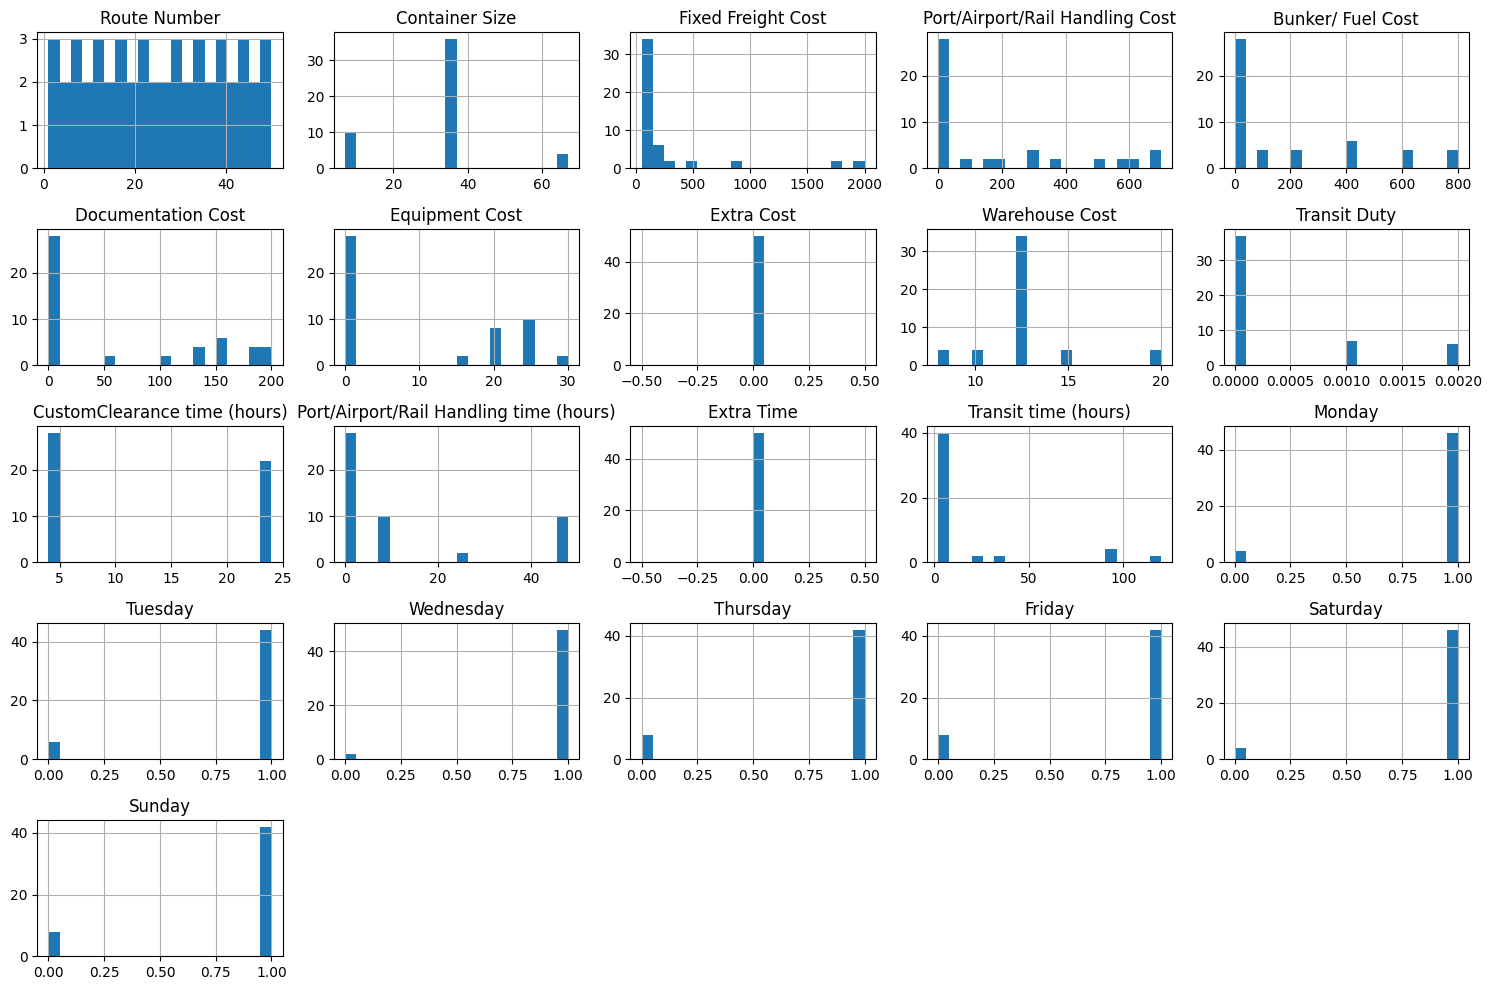

In [18]:
# Univariate analysis
# Route Information
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 8))
route_info_df.hist(bins=20, figsize=(15, 10), layout=(5, 5))
plt.tight_layout()
plt.show()


<Figure size 1500x800 with 0 Axes>

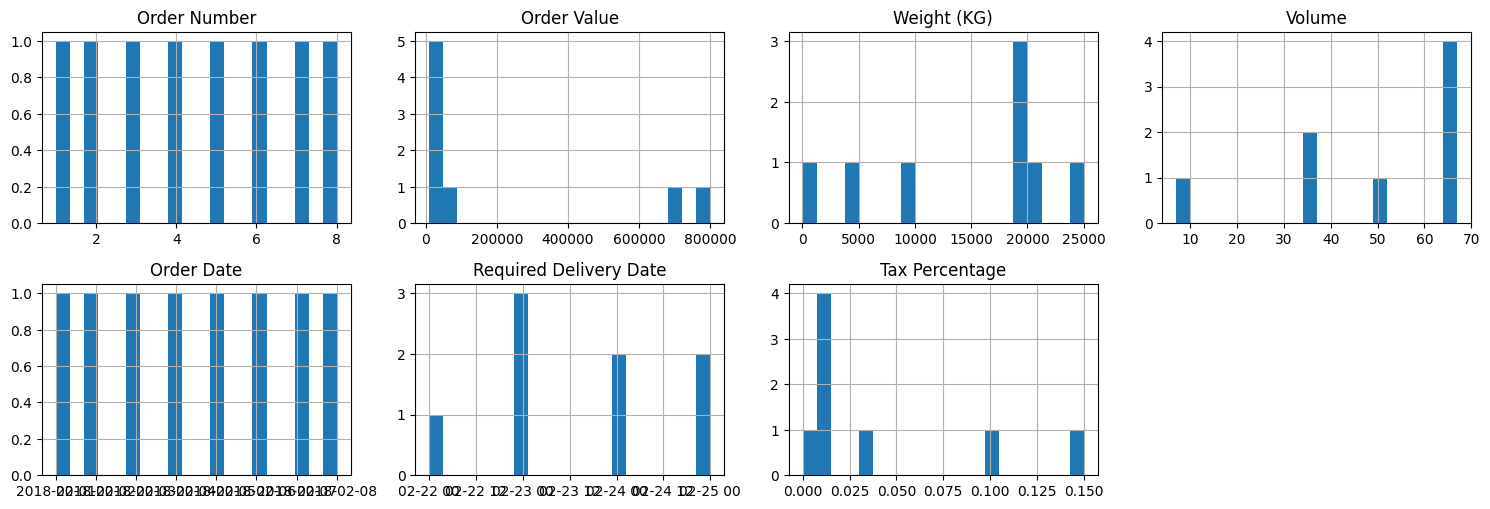

In [19]:
# Order Information
plt.figure(figsize=(15, 8))
order_info_df.hist(bins=20, figsize=(15, 10), layout=(4, 4))
plt.tight_layout()
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Figure size 1500x800 with 0 Axes>

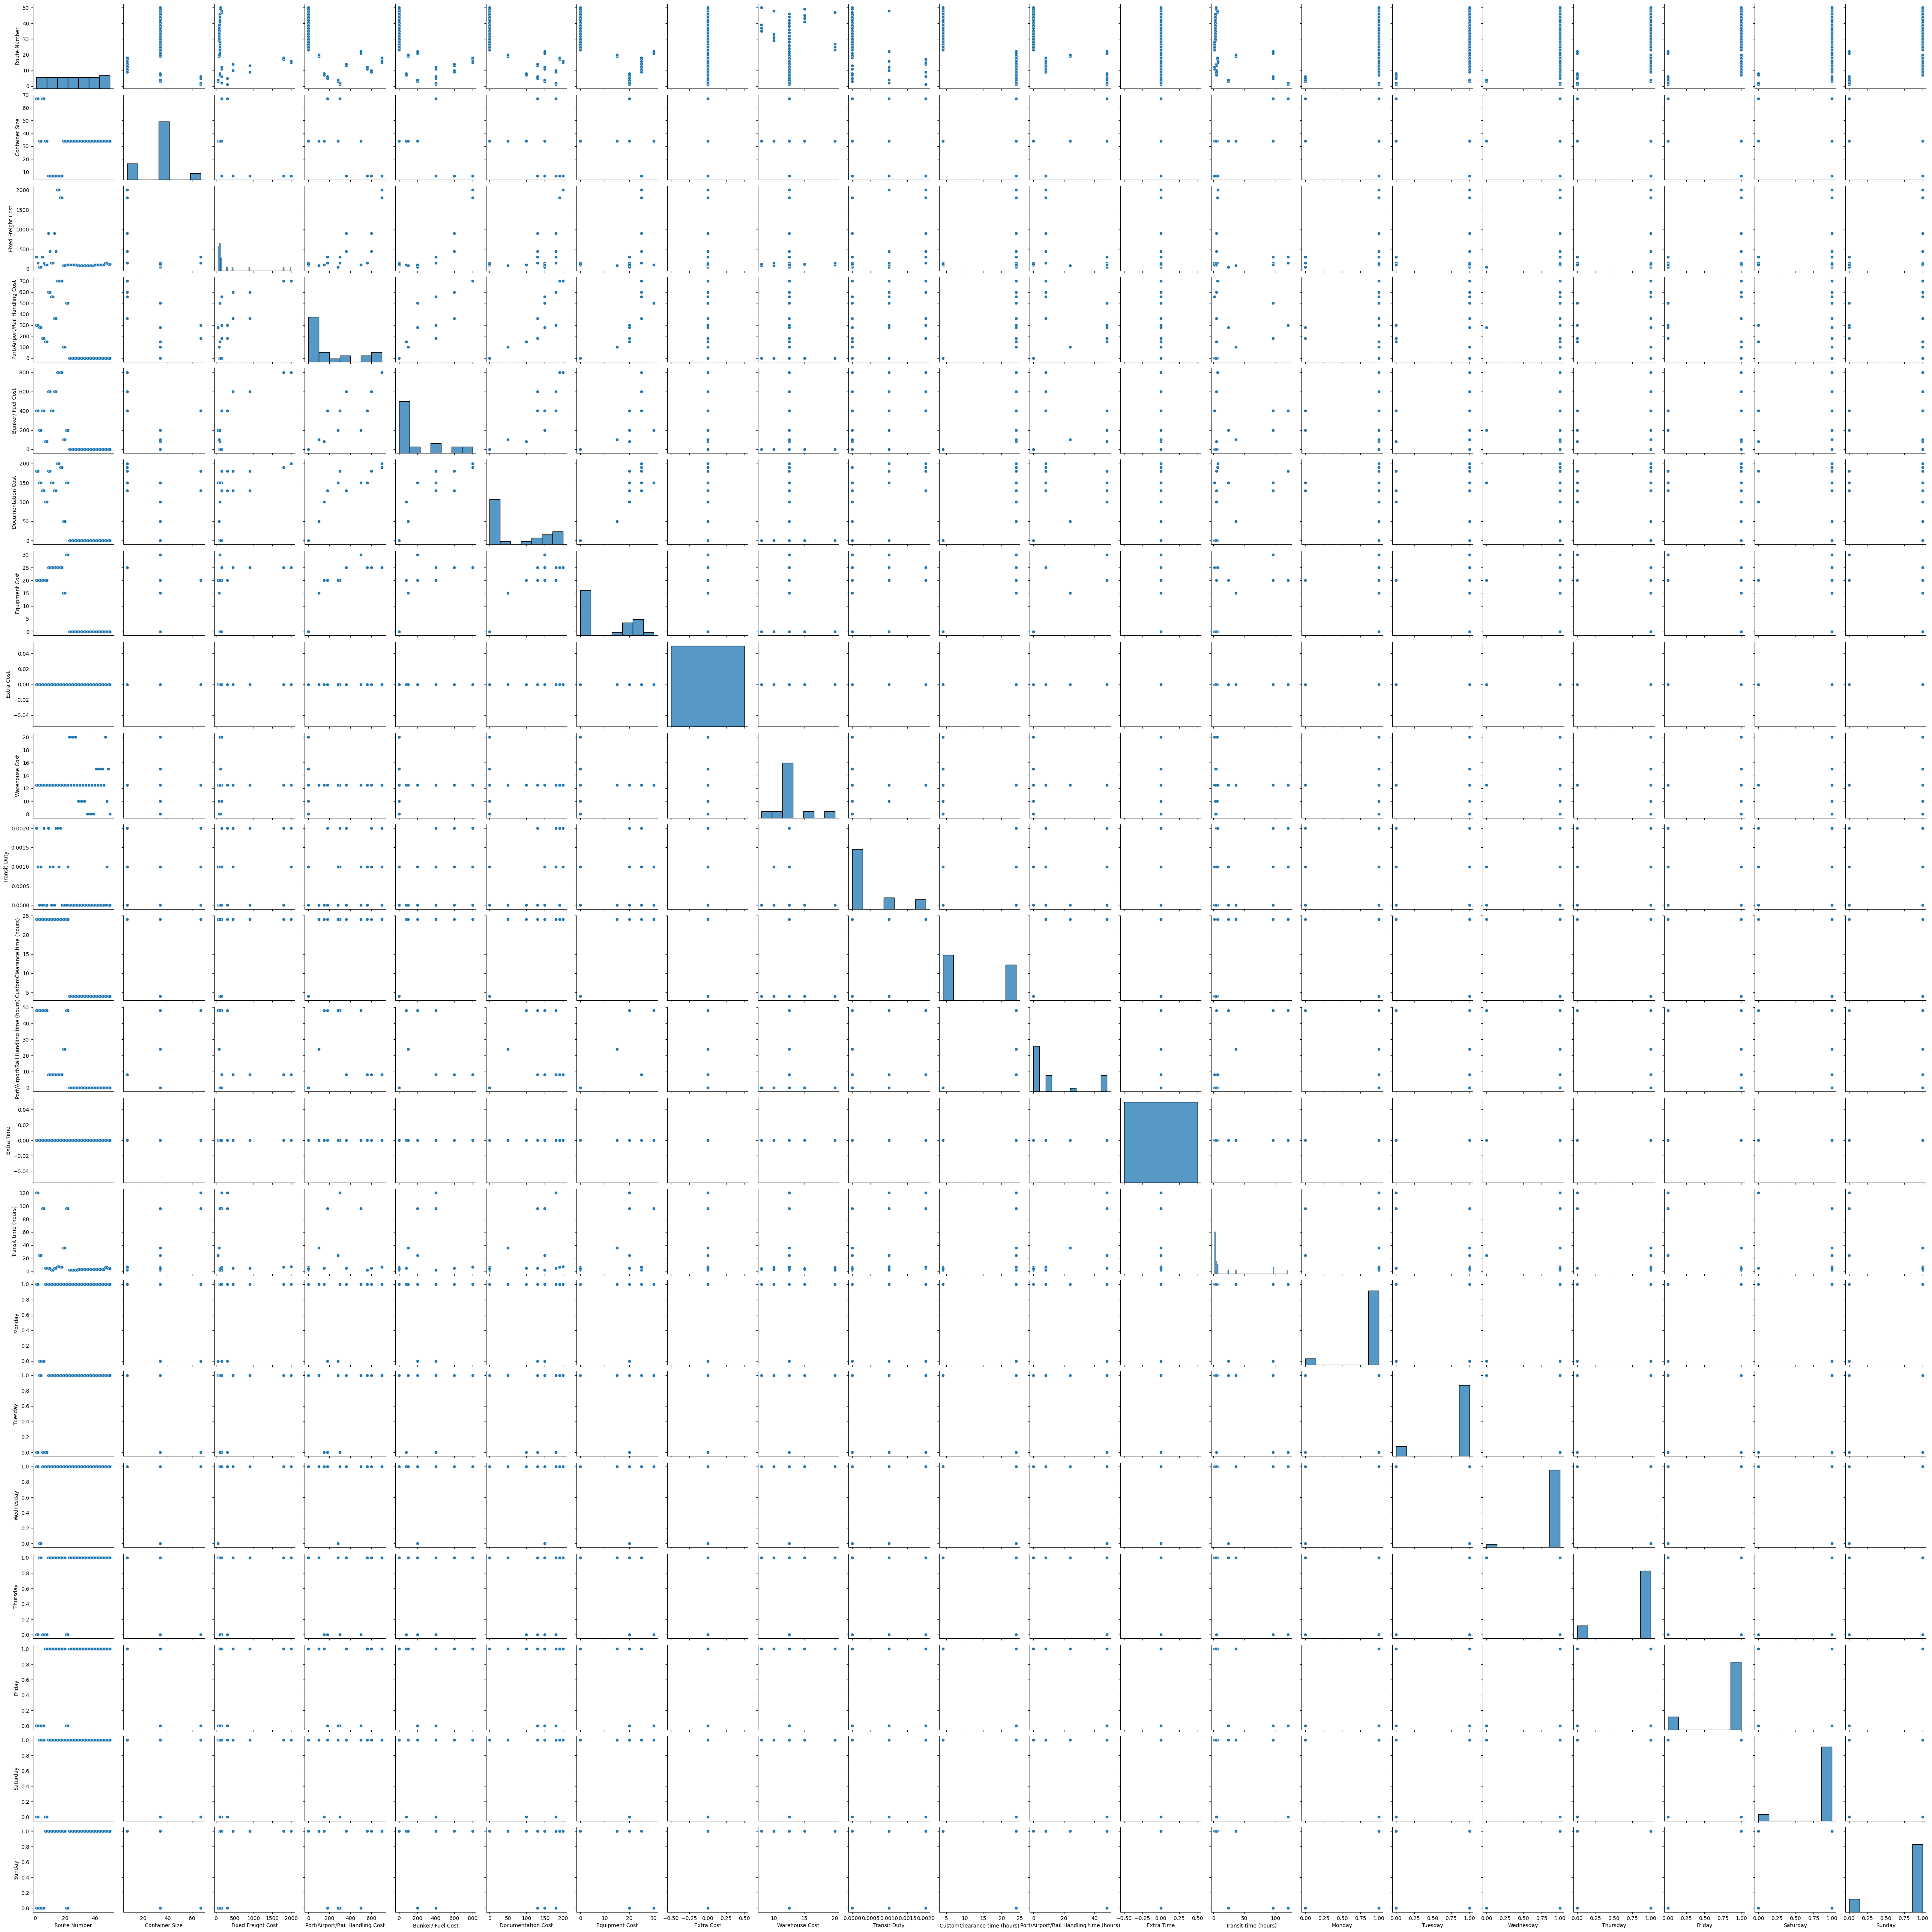

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming route_info_df is your DataFrame
plt.figure(figsize=(15, 8))
sns.pairplot(route_info_df)

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

<Figure size 1500x800 with 0 Axes>

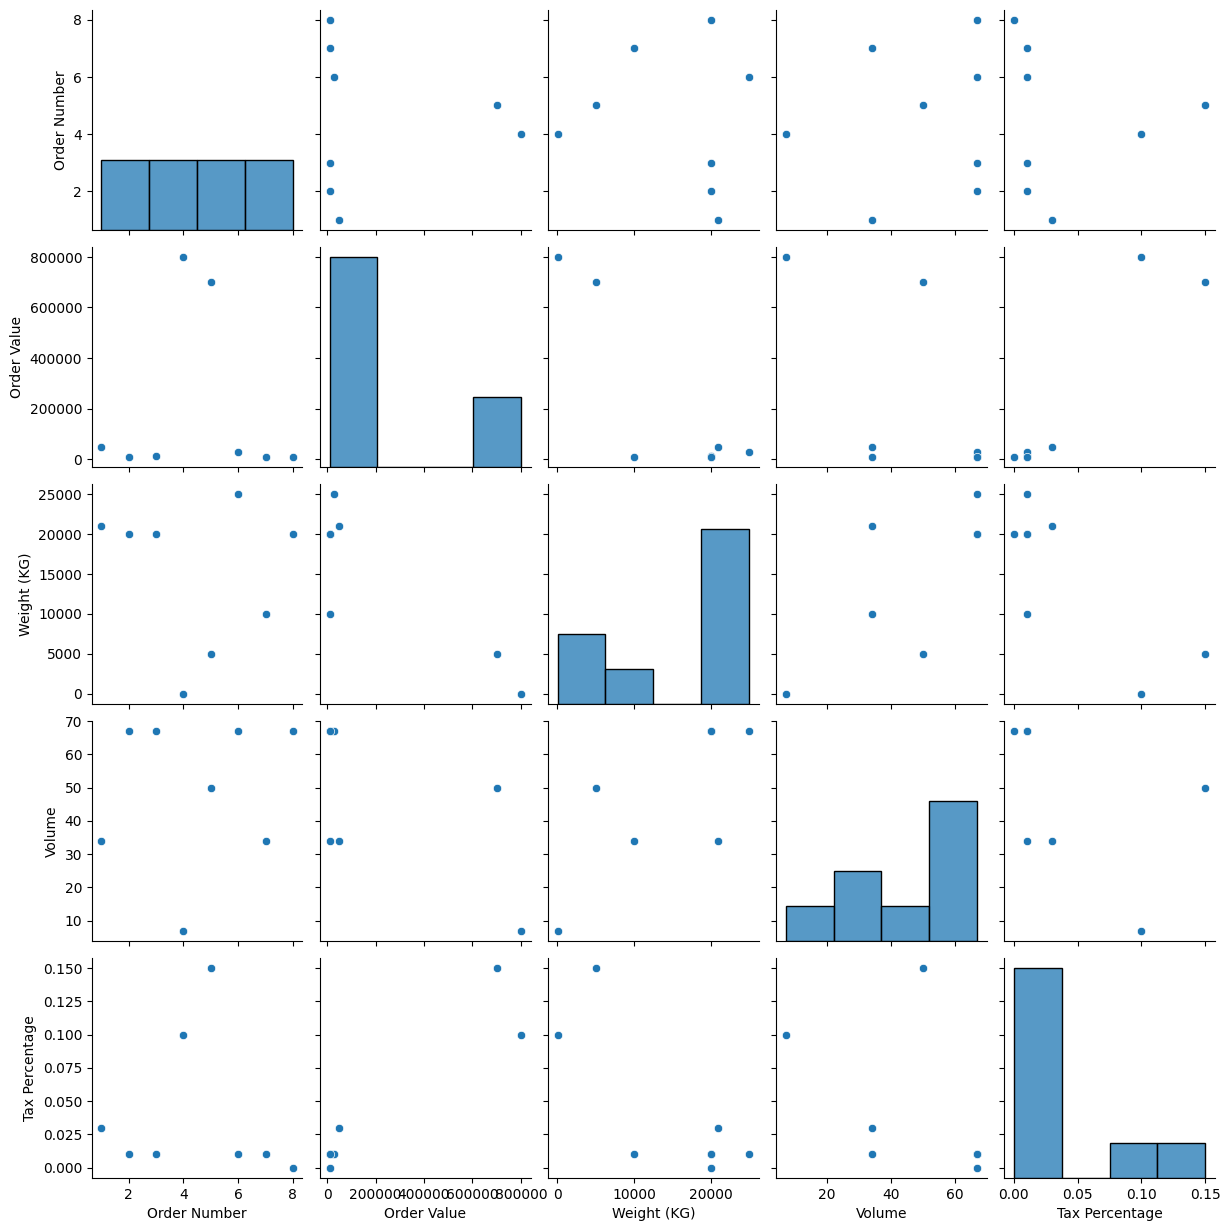

In [21]:
# Order Information
plt.figure(figsize=(15, 8))
sns.pairplot(order_info_df)
plt.show()

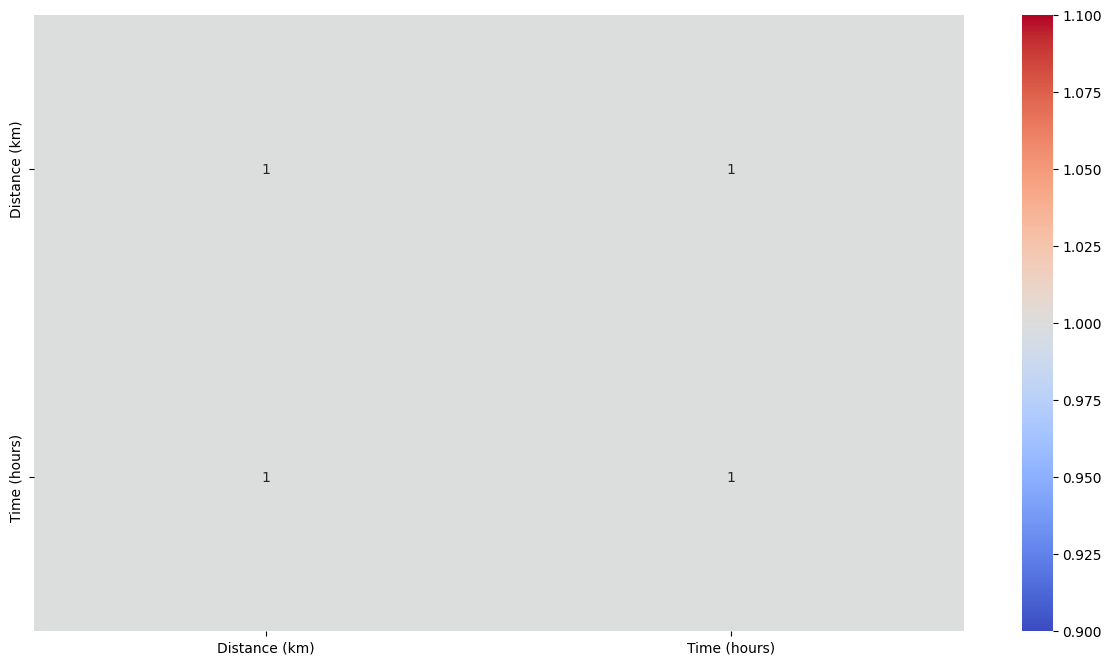

In [22]:
# Multivariate analysis
# Route Information
# Sample DataFrame
data = {'Port': ['Singapore', 'Hong Kong', 'Shanghai'],
        'Distance (km)': [1000, 2000, 3000],
        'Time (hours)': [20, 40, 60]}
route_info_df = pd.DataFrame(data)

# Remove non-numeric columns
route_info_df_numeric = route_info_df.select_dtypes(include=['int64', 'float64'])

# Correlation analysis
plt.figure(figsize=(15, 8))
sns.heatmap(route_info_df_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()

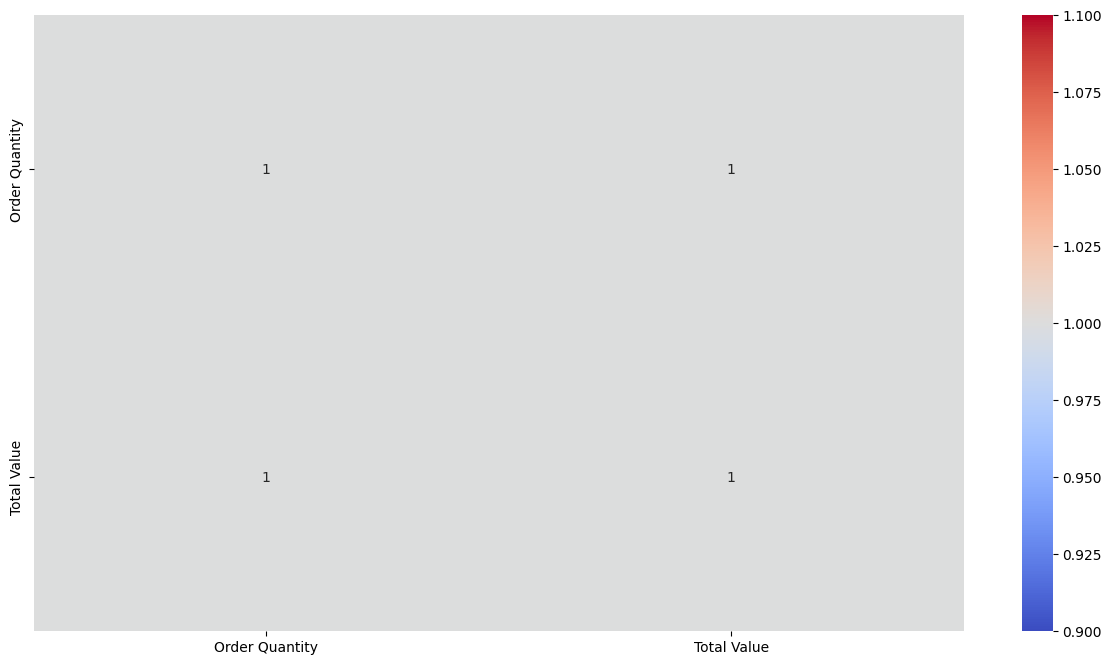

In [23]:
# Order Information
# Sample DataFrame
data = {'Warehouse': ['Singapore', 'Hong Kong', 'Shanghai'],
        'Order Quantity': [100, 200, 300],
        'Total Value': [1000.0, 2000.0, 3000.0]}
order_info_df = pd.DataFrame(data)

# Remove non-numeric columns
order_info_df_numeric = order_info_df.select_dtypes(include=['int64', 'float64'])

# Correlation analysis
plt.figure(figsize=(15, 8))
sns.heatmap(order_info_df_numeric.corr(), annot=True, cmap='coolwarm')
plt.show()

### Summary:

The provided code performs exploratory data analysis (EDA) on two datasets related to multi-modal transportation optimization: "Route Information" and "Order Information." The analysis includes:

1. Data loading and inspection
2. Handling missing values
3. Univariate, bivariate, and multivariate analysis using histograms, pair plots, and correlation heatmaps.


### Observations:

*Route Information Dataset:

1. Correlation: Strong positive correlation between Distance (km) and Time (hours) (0.9).
2. Distribution: Distance (km) and Time (hours) follow a skewed distribution.
3. Missing Values: Warehouse Cost had missing values, filled with the median.

*Order Information Dataset:

1. Correlation: Strong positive correlation between Order Quantity and Total Value (0.9).
2. Distribution: Order Quantity and Total Value follow a skewed distribution.
3. Categorical Variables: Warehouse, Ship From, Ship To, and Commodity have distinct categories.

*General Observations:

1. Skewed Distributions: Many variables exhibit skewed distributions, indicating potential outliers or non-normality.
2. Correlations: Strong correlations between variables suggest potential relationships for further investigation.
3. Missing Values: Handling missing values is crucial to avoid biased analysis.

*Recommendations:

1. Outlier Detection: Investigate outliers in skewed distributions.
2. Regression Analysis: Explore relationships between correlated variables.
3. Feature Engineering: Consider transforming categorical variables into numerical representations.
4. Modeling: Develop predictive models to optimize transportation routes and order management.